# EDA

### Table of Contents

* [Part I: Research Question](#Research_Question)
    * [Section 1A](#section_1_1)
    * [Section 1B](#Section_1_2)
* [Part II: Data-Cleaning Plan](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
* [Part III: Data Cleaning](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
* [Part IV: Data Cleaning](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

# Business Questions

## Realtor

As a realtor, I would like to know the following:

- What is the average house price for each individual zipcode 
    - Which zipcodes have the highest average 
    - Factors that contribute to it?
        - What features predict higher prices?
        - What is the average living area of these houses?
        - What year were these houses built?
    - Do number of bathrooms and bedrooms affect the housing price?
    - Does the year that a house was built affect the price and value?
    - Does renovation increase the value of the price of that home was sold?
    - Does houses on the waterfront have a higher sale price?
    - Does a view affect sale price?
    - What level of condition sells the highest?

## KPIs

As a realtor, I’d like to see the following KPIs:

- Average Price Per Zipcode
- Price per Square Foot
- Average Price Per Level of Condition

# Extract Data 

In [65]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plot 
import matplotlib
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib
import seaborn as sns


Using matplotlib backend: Qt5Agg


In [67]:
import missingno as msno

In [68]:
from pandas_profiling import ProfileReport

In [69]:
# Change date to timeseires format
df = pd.read_csv('kc_house_data.csv') 

In [70]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [71]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [72]:
df.shape

(21597, 21)

In [73]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We will drop the following columns: grade, sqft_above, lat, long, sqft_living15, sqft_lot15. These do not answer our business questions.

In [74]:
df2 = df.drop(['grade', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
dtypes: float64(8), int64(7), object(2)
memory usage: 2

### Deal with Missing Values

<AxesSubplot:>

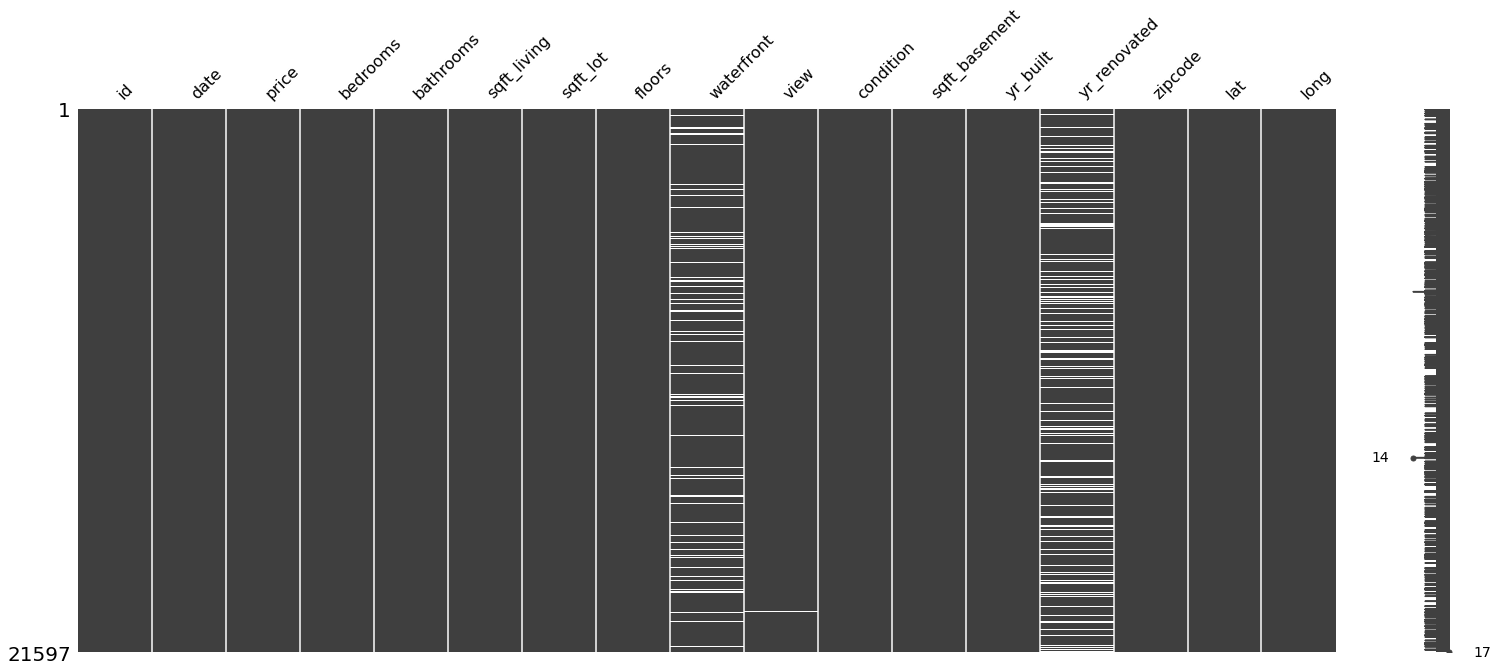

In [76]:
%matplotlib inline
msno.matrix(df2)

There are some missing values in columns of Waterfront and yr_renovated.  Waterfront is categorical, labeld as 0 or 1. Yr-renovated is integer, indicating the year if the house was renovvated. If null, not renovated. 

In [77]:
df2.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
dtype: int64

In [78]:
df2['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

This is for view. 0 means no view. Other values reflect the quality/rating of the view. The meaning of this quality/rating has not been established. May have to encode the value to be categorical. 

In [79]:
df2['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [80]:
df2['waterfront'].unique()

array([nan,  0.,  1.])

In [81]:
df2['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [82]:
df2['waterfront'].isnull().sum()

2376

Waterfront is categorical. We will asume that all NULLS are 0. We will need to check latitude and longitude later to validate if this is true. 

In [83]:
df2['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [84]:
df2['yr_renovated'].isnull().sum()

3842

Column yr_renovated has 0 and nulls. To process, either convert 0 to nulls or the other way around. 
<br>
If categorical data is needed, render as 0 or 1. 
<br>
If continuous data is needed, render any 0s as NULL. NULL meaning that it has not been renovated. This data can be further rendered into a date time format if we are doing a time series analysis or need a date data type. 

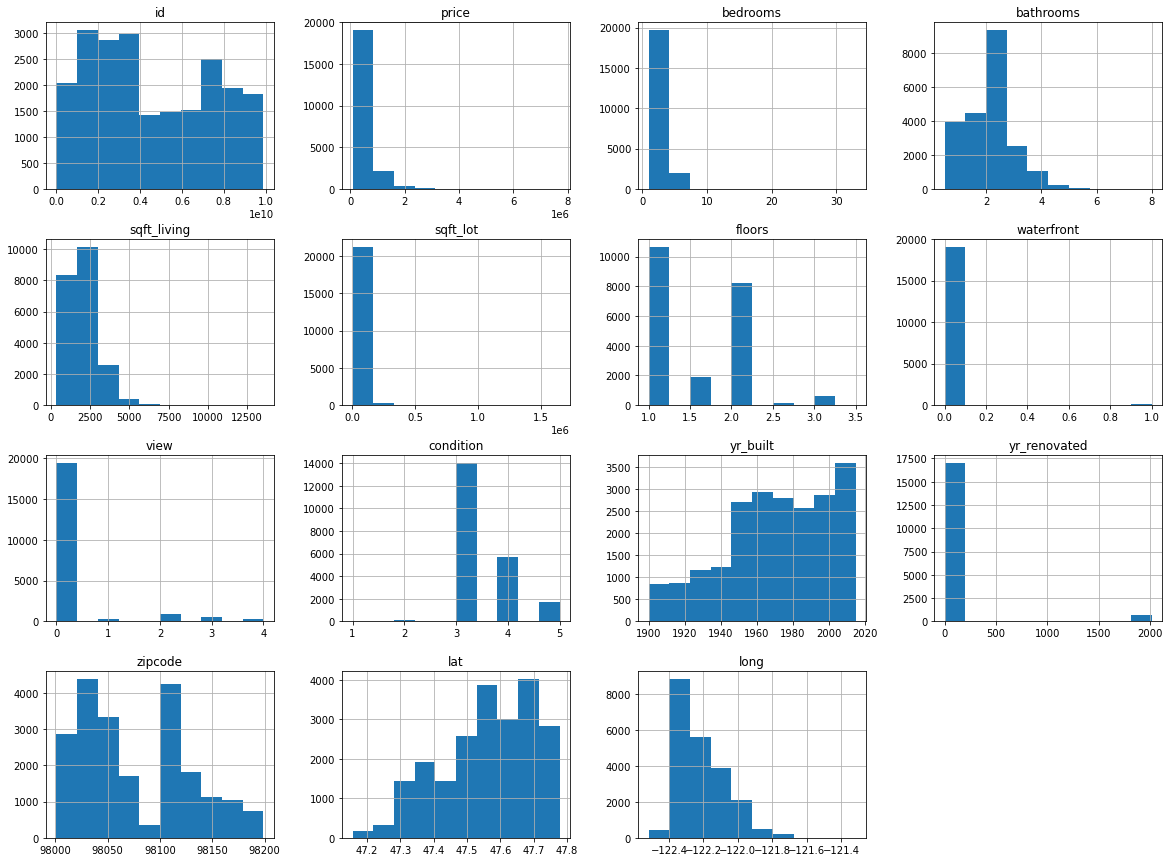

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

df2.hist(figsize=(20, 15))
plt.show()

These histograms have not been normalized. To be processed, columns need to be re-done if nessaccery.

In [86]:
df_plot = df[['price', 'bathrooms', 'bedrooms', 'sqft_living',  'yr_built' ]].copy()

Odd Outliers: 
- Bedrooms. Some places have a lower price, for 8 bedrooms 
- Bathrooms Some places 

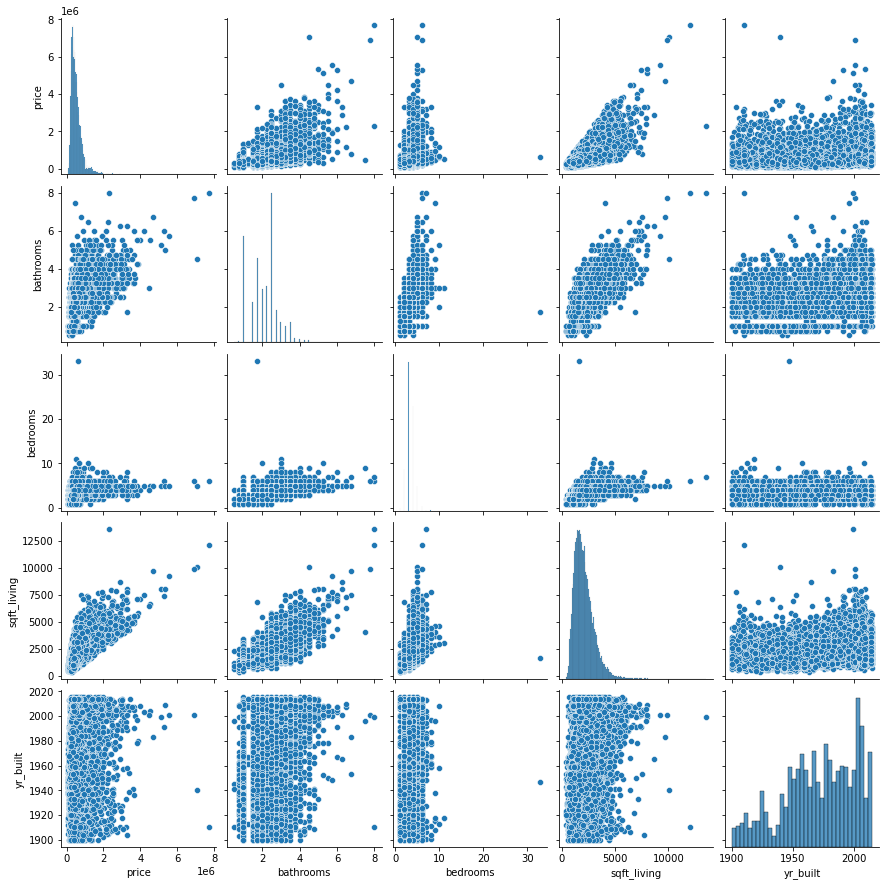

In [87]:
sns.pairplot(df_plot)
plt.show()

In [88]:
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,0.0,1955,0.0,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,0.0,1933,NaN,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,910.0,1965,0.0,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,0.0,1987,0.0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,0.0,2009,0.0,98103,47.6993,-122.346
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,0.0,2014,0.0,98146,47.5107,-122.362
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,0.0,2009,0.0,98144,47.5944,-122.299
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,0.0,2004,0.0,98027,47.5345,-122.069


# Cleaning

## Convert View '0' to NAN 

In [89]:
df2['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [90]:
#converting 0 to NaN. 
df2['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

Can also apply with lamda to change 0.0 to nan

## Year Renovated - Convert Zeroes to NaN

In [91]:
df2['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [92]:
df2['yr_renovated'].replace(0, np.nan, inplace=True)

In [93]:
df2['yr_renovated'].unique()

array([  nan, 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [94]:
df2['yr_renovated'].isna().sum()

20853

## Quartiles 

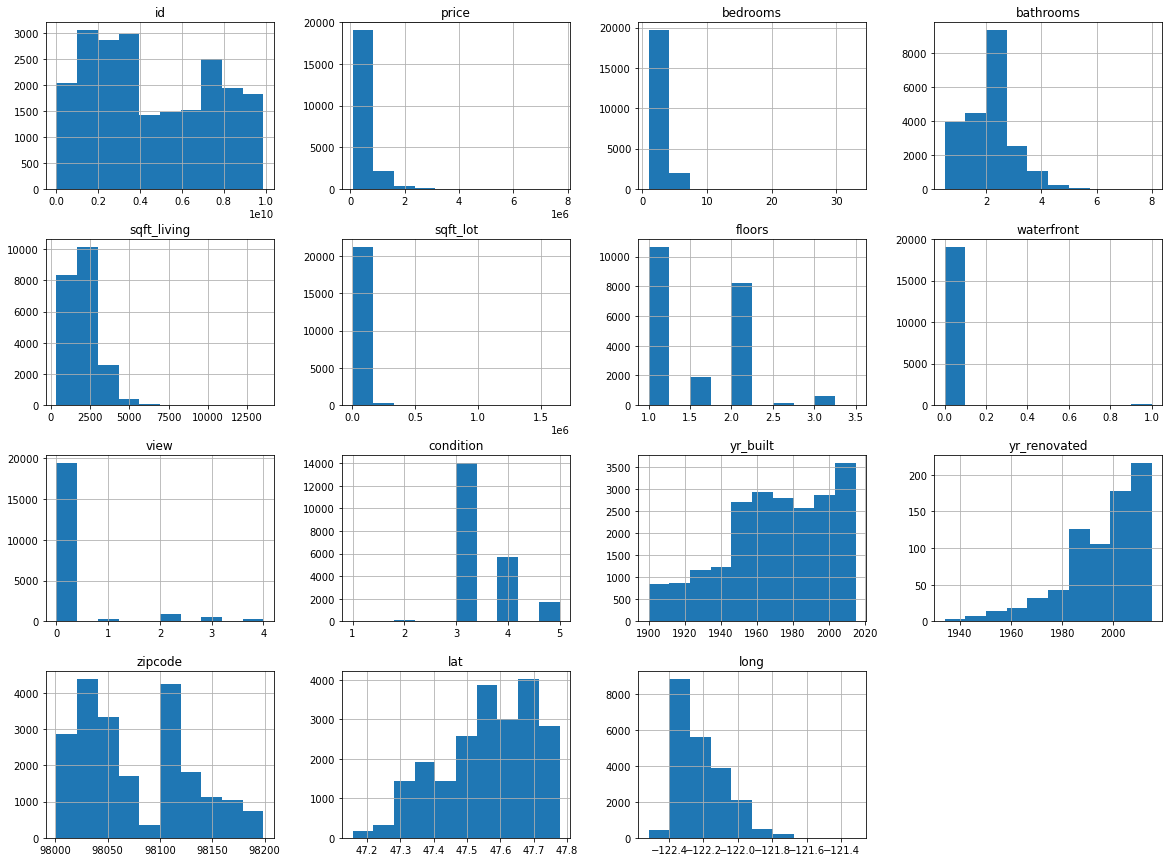

In [95]:
df2.hist(figsize=(20, 15))
plt.show()

Year built date average changed from 1971 to 1958. This is reflective of the baby boom and the post war bulding boom. The standard deviation for the yr_built also dropped, implying that we cleaned out a few outliers. The variance is reduced. 

In [96]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,744.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,1970.999676,1995.928763,98077.951845,47.560093,-122.213982
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,29.375234,15.599946,53.513072,0.138552,0.140724
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1951.000000,1987.000000,98033.000000,47.471100,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,1975.000000,2000.000000,98065.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,1997.000000,2007.250000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [97]:
df_plot2 = df2[['price', 'bathrooms', 'bedrooms', 'sqft_living','yr_renovated','yr_built','view' ]].copy()

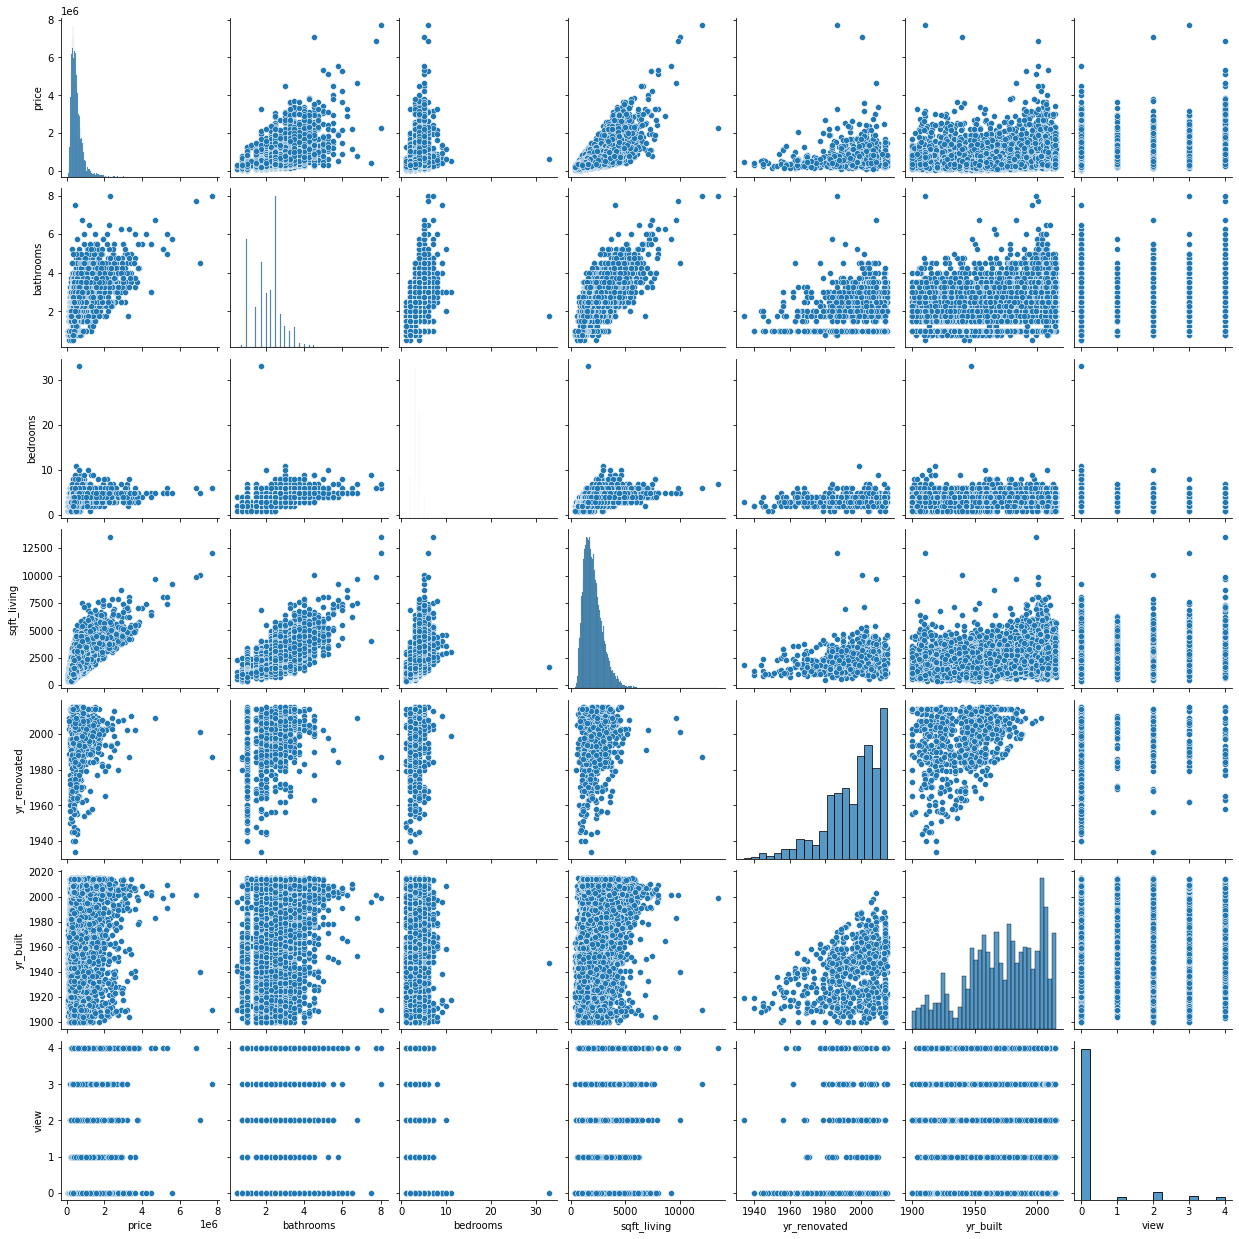

In [98]:
sns.pairplot(df_plot2)
plt.show()

In [99]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [100]:
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,0.0,1955,NaN,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,0.0,1933,NaN,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,910.0,1965,NaN,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,0.0,1987,NaN,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,0.0,2009,NaN,98103,47.6993,-122.346
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,0.0,2014,NaN,98146,47.5107,-122.362
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,0.0,2009,NaN,98144,47.5944,-122.299
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,0.0,2004,NaN,98027,47.5345,-122.069


In [101]:
Q1 = df2.quantile(0.001)
Q3 = df2.quantile(0.999)
IQR = Q3 - Q1

df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [102]:
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
count,2.159500e+04,2.159500e+04,21595.000000,21595.000000,21595.000000,2.159500e+04,21595.000000,19219.000000,21532.000000,21595.000000,21595.000000,744.000000,21595.000000,21595.000000,21595.000000
mean,4.580740e+09,5.402846e+05,3.371799,2.115895,2080.379301,1.502406e+04,1.494142,0.007597,0.233745,3.409724,1971.003149,1995.928763,98077.953276,47.560102,-122.213986
std,2.876729e+09,3.673829e+05,0.904125,0.768978,918.127939,3.988947e+04,0.539687,0.086829,0.765488,0.650473,29.374090,15.599946,53.513924,0.138537,0.140722
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1951.000000,1987.000000,98033.000000,47.471100,-122.328000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,1975.000000,2000.000000,98065.000000,47.571800,-122.231000
75%,7.309000e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,2.000000,0.000000,0.000000,4.000000,1997.000000,2007.250000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [103]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21595 non-null  int64  
 1   date           21595 non-null  object 
 2   price          21595 non-null  float64
 3   bedrooms       21595 non-null  int64  
 4   bathrooms      21595 non-null  float64
 5   sqft_living    21595 non-null  int64  
 6   sqft_lot       21595 non-null  int64  
 7   floors         21595 non-null  float64
 8   waterfront     19219 non-null  float64
 9   view           21532 non-null  float64
 10  condition      21595 non-null  int64  
 11  sqft_basement  21595 non-null  object 
 12  yr_built       21595 non-null  int64  
 13  yr_renovated   744 non-null    float64
 14  zipcode        21595 non-null  int64  
 15  lat            21595 non-null  float64
 16  long           21595 non-null  float64
dtypes: float64(8), int64(7), object(2)
memory usage: 3

In [104]:
df3['yr_built'].value_counts() 

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [105]:
df3['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [106]:
df3['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [107]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,0.0,1955,NaN,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,0.0,1933,NaN,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,910.0,1965,NaN,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,0.0,1987,NaN,98074,47.6168,-122.045


In [211]:
df_plot3 = df3[['price', 'bathrooms', 'bedrooms', 'sqft_living','yr_renovated','yr_built','view', 'waterfront', 'condition' ]].copy()

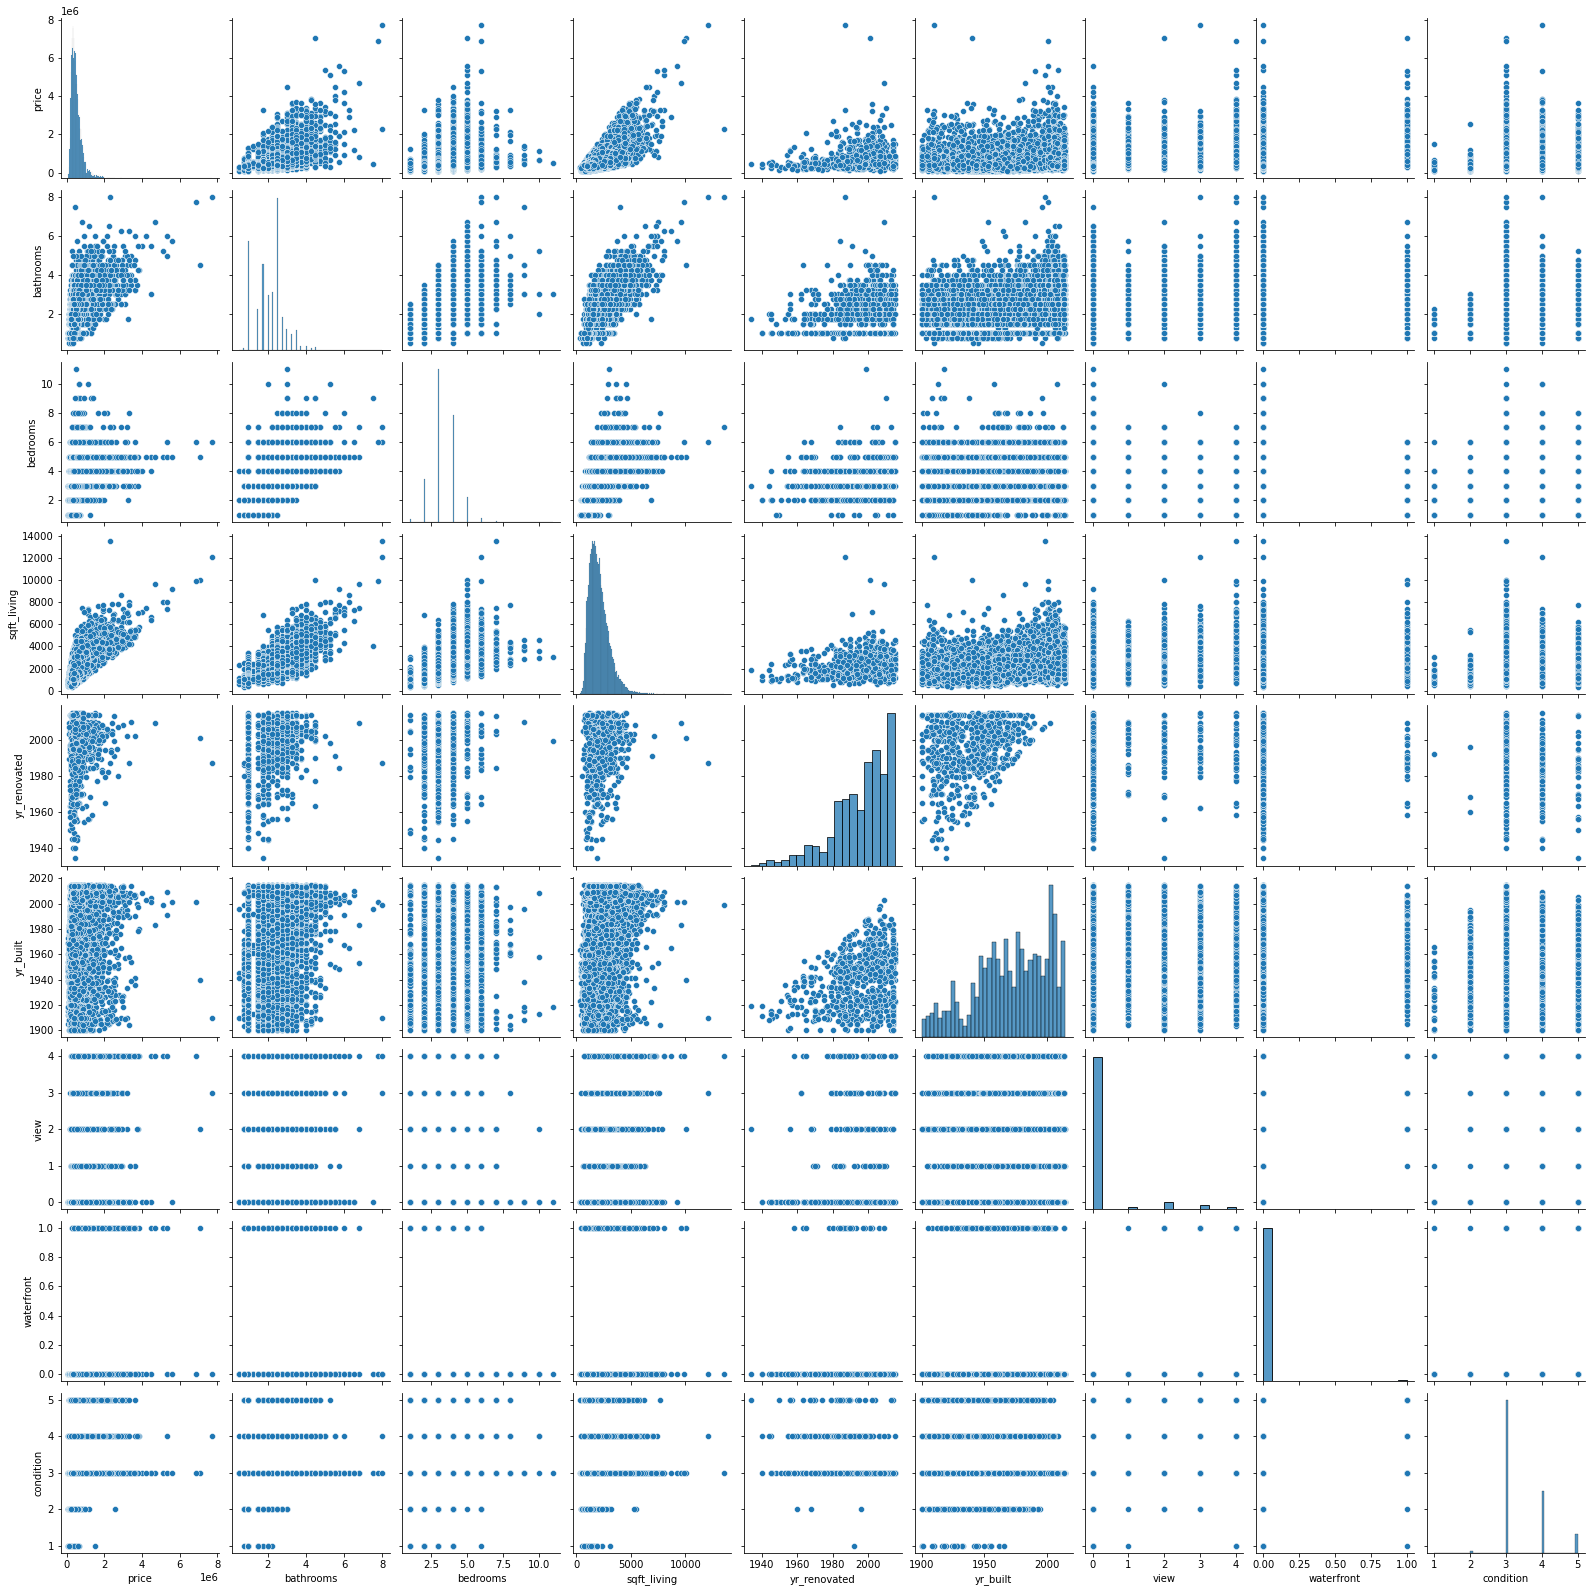

In [212]:
sns.pairplot(df_plot3)
plt.show()

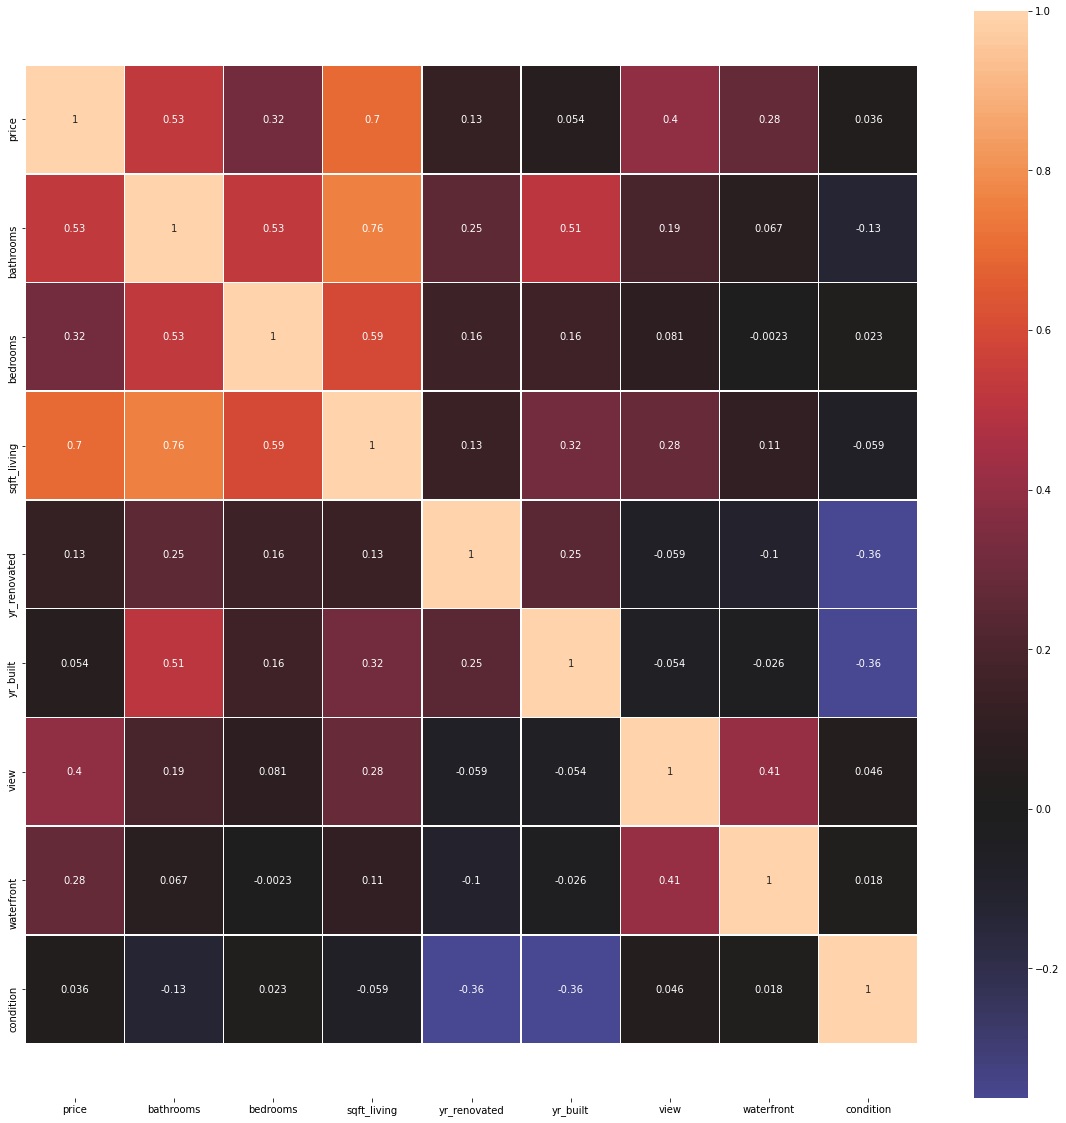

In [213]:
df_heatmap = df_plot3
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df_heatmap.corr(), center=0, linewidths=.5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Findings

# Business Questions

## Realtor

As a realtor, I would like to know the following:

- What is the average house price for each individual zipcode 
    - Which zipcodes have the highest average 
    - Factors that contribute to it?
        - What features predict higher prices?
        - What is the average living area of these houses?
        - What year were these houses built?
    - Do number of bathrooms and bedrooms affect the housing price?
    - Does the year that a house was built affect the price and value?
    - Does renovation increase the value of the price of that home was sold?
    - Does houses on the waterfront have a higher sale price?
    - Does a view affect sale price?
    - What level of condition sells the highest?

## KPIs

As a realtor, I’d like to see the following KPIs:

- Average Price Per Zipcode
- Price per Square Foot
- Average Price Per Level of Condition

### What was the average price per individual zip? 

In [177]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [178]:
test_df=df.sort_values(by=["zipcode","price"], ascending=[False, True])
test_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4704,6821102350,1/9/2015,323000.000,2,1.000,880,1712,2.000,0.000,0.000,...,7,880,0.0,1945,nan,98199,47.648,-122.397,1360,1748
3896,6821102352,10/8/2014,330000.000,2,1.000,880,1753,2.000,0.000,0.000,...,7,880,0.0,1945,0.000,98199,47.648,-122.397,1010,1748
274,4235400186,11/24/2014,331000.000,3,1.750,1080,1306,1.000,0.000,0.000,...,7,580,500.0,1954,2003.000,98199,47.660,-122.400,1440,2225
17363,6821102385,3/26/2015,334000.000,2,1.000,900,1818,2.000,0.000,0.000,...,7,900,0.0,1945,0.000,98199,47.648,-122.397,1570,1830
8451,6821101827,11/5/2014,340000.000,2,1.750,1010,1461,1.000,0.000,0.000,...,7,670,340.0,2003,0.000,98199,47.651,-122.400,1500,2499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9309,4420600015,10/6/2014,571500.000,4,2.250,2810,25990,2.000,0.000,0.000,...,8,1860,950.0,1959,nan,98001,47.299,-122.293,2020,16140
18792,2721049061,7/9/2014,625000.000,3,1.750,3160,76230,1.000,0.000,0.000,...,8,2160,1000.0,1978,0.000,98001,47.274,-122.287,1990,45789
18274,9262800208,9/19/2014,637000.000,4,3.500,4083,68377,2.000,0.000,0.000,...,10,4083,0.0,2005,nan,98001,47.311,-122.262,2430,41382
6139,3522049063,4/2/2015,639900.000,4,2.500,3380,75794,2.000,0.000,0.000,...,10,3380,?,1997,0.000,98001,47.351,-122.266,3710,17913


In [179]:
new = test_df.groupby('zipcode')['price'].mean()

In [180]:
new

zipcode
98001    281194.870
98002    234284.035
98003    294111.279
98004   1356523.991
98005    810289.696
            ...    
98177    676419.392
98178    310612.756
98188    289078.346
98198    302896.739
98199    792187.874
Name: price, Length: 70, dtype: float64

In [181]:
new = new.reset_index()

In [182]:
avg_sort = new.sort_values(by="price", ascending=False)

In [187]:

avg_sort

,zipcode,price
24,98039,2161300.000
3,98004,1356523.991
25,98040,1194873.638
48,98112,1096239.007
41,98102,899607.673
...,...,...
61,98148,284908.596
0,98001,281194.870
20,98032,251296.240
64,98168,240328.372


In [185]:
avg_sort['price'].mean()

561010.9269793853

In [188]:
avg_sort.head(20)

,zipcode,price
24,98039,2161300.000
3,98004,1356523.991
25,98040,1194873.638
48,98112,1096239.007
41,98102,899607.673
47,98109,880077.752
43,98105,863228.943
5,98006,859938.554
53,98119,849714.810
4,98005,810289.696


## Average Price Per Level of Condition

In [200]:
df['condition']

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21597, dtype: int64

In [201]:
condition_df=df.sort_values(by=["zipcode",'price'], ascending=[False, True])
condition_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4704,6821102350,1/9/2015,323000.000,2,1.000,880,1712,2.000,0.000,0.000,4,7,880,0.0,1945,nan,98199,47.648,-122.397,1360,1748
3896,6821102352,10/8/2014,330000.000,2,1.000,880,1753,2.000,0.000,0.000,4,7,880,0.0,1945,0.000,98199,47.648,-122.397,1010,1748
274,4235400186,11/24/2014,331000.000,3,1.750,1080,1306,1.000,0.000,0.000,3,7,580,500.0,1954,2003.000,98199,47.660,-122.400,1440,2225
17363,6821102385,3/26/2015,334000.000,2,1.000,900,1818,2.000,0.000,0.000,4,7,900,0.0,1945,0.000,98199,47.648,-122.397,1570,1830
8451,6821101827,11/5/2014,340000.000,2,1.750,1010,1461,1.000,0.000,0.000,3,7,670,340.0,2003,0.000,98199,47.651,-122.400,1500,2499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9309,4420600015,10/6/2014,571500.000,4,2.250,2810,25990,2.000,0.000,0.000,3,8,1860,950.0,1959,nan,98001,47.299,-122.293,2020,16140
18792,2721049061,7/9/2014,625000.000,3,1.750,3160,76230,1.000,0.000,0.000,4,8,2160,1000.0,1978,0.000,98001,47.274,-122.287,1990,45789
18274,9262800208,9/19/2014,637000.000,4,3.500,4083,68377,2.000,0.000,0.000,3,10,4083,0.0,2005,nan,98001,47.311,-122.262,2430,41382
6139,3522049063,4/2/2015,639900.000,4,2.500,3380,75794,2.000,0.000,0.000,3,10,3380,?,1997,0.000,98001,47.351,-122.266,3710,17913


In [202]:
df_con = condition_df.groupby('condition')['price'].mean()

In [203]:
df_con = df_con.reset_index()

In [206]:
df_con

,condition,price
0,1,341067.241
1,2,328178.759
2,3,542173.057
3,4,521374.450
4,5,612577.743
